In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import geopandas as gpd
import folium
import geopy
from sklearn import preprocessing, cluster
import scipy
import minisom

In [2]:
#firstly, the data must be presented to anaylse what columns are found to be relevant to this research (WHS= world heritage sites)
df = pd.read_csv('whs2021.csv')
df.head()


Name  \
0  L’Anse aux Meadows National Historic Site   
1                      Nahanni National Park   
2                          Galápagos Islands   
3                              City of Quito   
4                       Simien National Park   

                                   short_description  date_inscribed  danger  \
0  <p>At the tip of the Great Northern Peninsula ...            1978       0   
1  <p>Located along the South Nahanni River, one ...            1978       0   
2  <p>Situated in the Pacific Ocean some 1,000 km...            1978       0   
3  <p>Quito, the capital of Ecuador, was founded ...            1978       0   
4  <p>Massive erosion over the years on the Ethio...            1978       0   

   date_end   longitude   latitude  area_hectares category_long  \
0       NaN  -55.616667  51.466667        7991.00      Cultural   
1       NaN -125.589444  61.547222      476560.00       Natural   
2    2010.0  -90.501319  -0.689860    14066514.00       Natural   
3       NaN  -78.512083  -0.220000          70.43      Cultural   
4    2017.0   38.066667  13.183333       13600.00       Natural   

  category_short Country name                           Region iso_code  \
0              C       Canada         Europe and North America       ca   
1              N       Canada         Europe and North America       ca   
2              N      Ecuador  Latin America and the Caribbean       ec   
3              C      Ecuador  Latin America and the Caribbean       ec   
4              N     Ethiopia                           Africa       et   

   transboundary rev_bis  
0              0     NaN  
1              0     NaN  
2              0     Bis  
3              0     NaN  
4              0     NaN

In [3]:
#clean the data by deleting columns irrelevant to motivations/ research aim
df.drop(['iso_code', 'transboundary', 'rev_bis', 'category_short', 'area_hectares'], axis=1)



Name  \
0             L’Anse aux Meadows National Historic Site   
1                                 Nahanni National Park   
2                                     Galápagos Islands   
3                                         City of Quito   
4                                  Simien National Park   
...                                                 ...   
1150  The work of engineer Eladio Dieste: Church of ...   
1151                      The Great Spa Towns of Europe   
1152  Frontiers of the Roman Empire – The Danube Lim...   
1153                            Colonies of Benevolence   
1154  Frontiers of the Roman Empire – The Lower Germ...   

                                      short_description  date_inscribed  \
0     <p>At the tip of the Great Northern Peninsula ...            1978   
1     <p>Located along the South Nahanni River, one ...            1978   
2     <p>Situated in the Pacific Ocean some 1,000 km...            1978   
3     <p>Quito, the capital of Ecuador, was founded ...            1978   
4     <p>Massive erosion over the years on the Ethio...            1978   
...                                                 ...             ...   
1150  <p>The Church of Atlántida with its belfry and...            2021   
1151  The transnational site of The Great Spa Towns ...            2021   
1152  <p>It covers almost 600km of the whole Roman E...            2021   
1153  <p>The transnational serial property encompass...            2021   
1154  <p>Following the left bank of the Lower Rhine ...            2021   

      danger  date_end   longitude   latitude category_long  \
0          0       NaN  -55.616667  51.466667      Cultural   
1          0       NaN -125.589444  61.547222       Natural   
2          0    2010.0  -90.501319  -0.689860       Natural   
3          0       NaN  -78.512083  -0.220000      Cultural   
4          0    2017.0   38.066667  13.183333       Natural   
...      ...       ...         ...        ...           ...   
1150       0       NaN  -55.766408 -34.743919      Cultural   
1151       0       NaN    5.866944  50.492222      Cultural   
1152       0       NaN   16.861389  48.115194      Cultural   
1153       0       NaN    6.391589  53.042222      Cultural   
1154       0       NaN    4.433000  52.180333      Cultural   

                                           Country name  \
0                                                Canada   
1                                                Canada   
2                                               Ecuador   
3                                               Ecuador   
4                                              Ethiopia   
...                                                 ...   
1150                                            Uruguay   
1151  Austria,Belgium,Czechia,France,Germany,Italy,U...   
1152                           Austria,Germany,Slovakia   
1153                                Belgium,Netherlands   
1154                                Germany,Netherlands   

                               Region  
0            Europe and North America  
1            Europe and North America  
2     Latin America and the Caribbean  
3     Latin America and the Caribbean  
4                              Africa  
...                               ...  
1150  Latin America and the Caribbean  
1151         Europe and North America  
1152         Europe and North America  
1153         Europe and North America  
1154         Europe and North America  

[1155 rows x 10 columns]

In [4]:
#The top 20 countries with the most WHS for tourists to visit:
df['Country name'].value_counts()[:20]
#I chose to see the top 20 as the numbers are not as repetitive as a larger scale would have been

China                                                   55
Italy                                                   51
Spain                                                   45
France                                                  43
Germany                                                 41
India                                                   39
Mexico                                                  35
United Kingdom of Great Britain and Northern Ireland    32
Russian Federation                                      26
Iran (Islamic Republic of)                              26
Japan                                                   24
United States of America                                22
Brazil                                                  22
Australia                                               20
Turkey                                                  19
Greece                                                  18
Canada                                                  

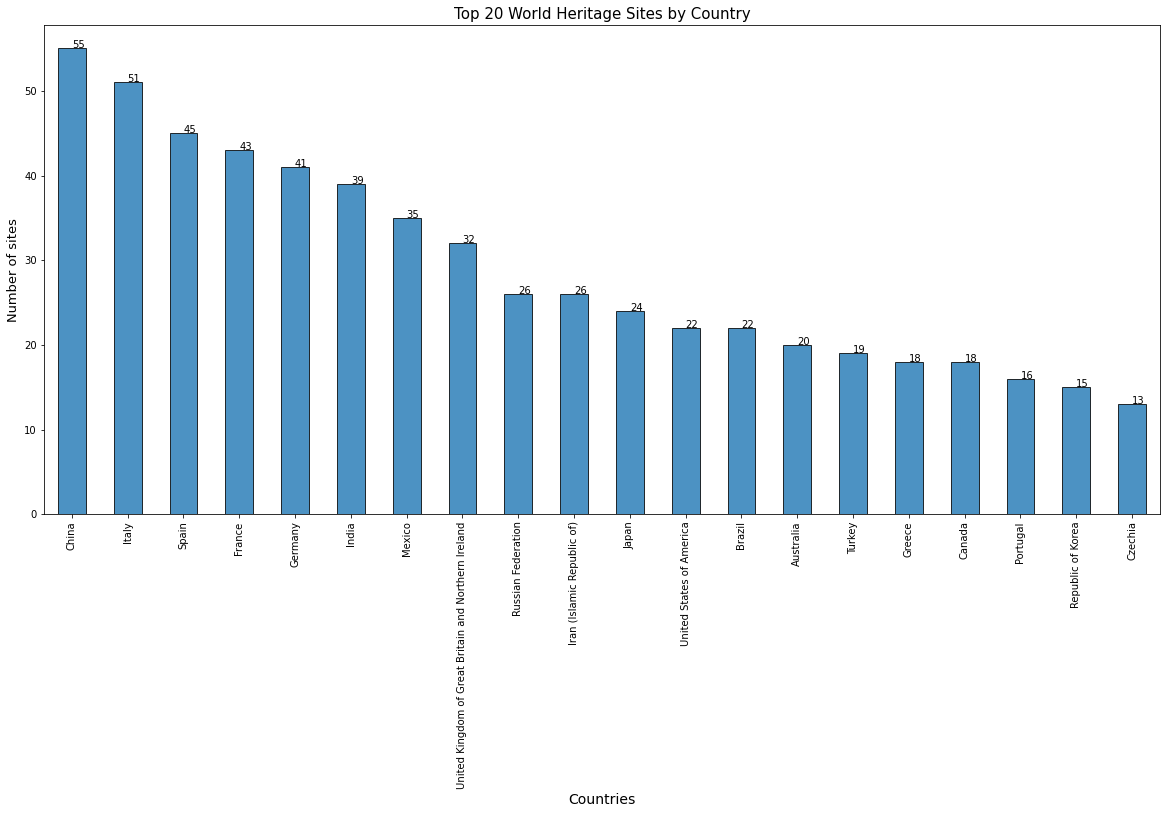

In [5]:
#plotting the top 20 countries with most WHS
plt.figure(figsize=(20,9))
df['Country name'].value_counts()[:20].plot(kind='bar',edgecolor='k', alpha=0.8)
  
for index, value in enumerate(df['Country name'].value_counts()[:20]):
    plt.text(index, value, str(value))
plt.xlabel("Countries", fontsize=14)
plt.ylabel("Number of sites", fontsize=13)
plt.title("Top 20 World Heritage Sites by Country", fontsize=15)
plt.show()

In [6]:
#WHS by region- what region has the largest number of sites?
df['Region'].value_counts()

Europe and North America                                                         545
Asia and the Pacific                                                             275
Latin America and the Caribbean                                                  146
Africa                                                                            98
Arab States                                                                       88
Asia and the Pacific,Europe and North America                                      2
Asia and the Pacific,Europe and North America,Latin America and the Caribbean      1
Name: Region, dtype: int64

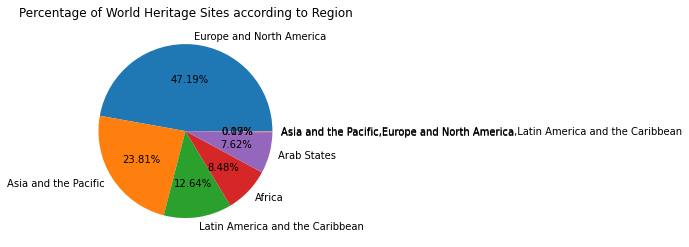

In [7]:
#A pie chart to show the percentage of each region
region_pie = df['Region'].value_counts()


fig = plt.figure()


region_pie.plot.pie(label="", title="Percentage of World Heritage Sites according to Region",autopct='%1.2f%%');
plt.show()

In [8]:
#percentage of WHS according to category of site
df['category_long'].value_counts()

Cultural    898
Natural     218
Mixed        39
Name: category_long, dtype: int64

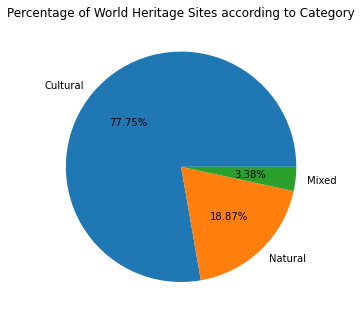

In [9]:
#plotting the percentage of WHS according to category in the form of a pie chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ser = df['category_long'].value_counts()

ser.plot.pie(label="", title="Percentage of World Heritage Sites according to Category",autopct='%1.2f%%');
plt.show()

In [10]:
#calculating the number of sites that are currently in danger
df['danger'].value_counts()

0    1103
1      52
Name: danger, dtype: int64

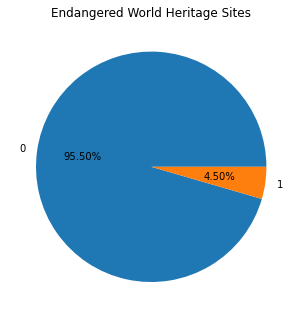

In [11]:
#plotting sites in and out of danger into a pie chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ser = df['danger'].value_counts()

ser.plot.pie(label="", title="Endangered World Heritage Sites",autopct='%1.2f%%');
plt.show()

In [12]:
#finding out when and how many sites stopped being in danger
df['date_end'].value_counts()


2007.0    4
2006.0    4
2004.0    3
2005.0    3
2017.0    3
2003.0    3
1998.0    2
2021.0    2
2012.0    2
2019.0    2
2001.0    1
2011.0    1
2015.0    1
2013.0    1
2010.0    1
1992.0    1
1997.0    1
2014.0    1
2016.0    1
2009.0    1
1988.0    1
1989.0    1
2018.0    1
Name: date_end, dtype: int64

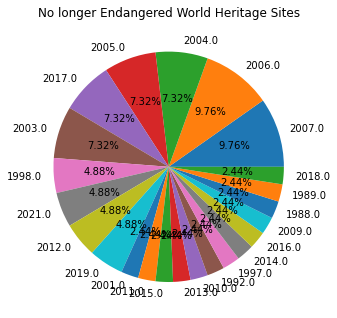

In [13]:
#a pie chart to show the percentage of sites that stopped being in danger by year
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ser = df['date_end'].value_counts()

ser.plot.pie(label="", title="No longer Endangered World Heritage Sites",autopct='%1.2f%%');
plt.show()

In [14]:
#using folio to produce an interactive world map of all the heritage sites with their names
m = folium.Map(location=[20, 0], tiles="OpenStreetMap", zoom_start=2.4)
 

for i in range(0,len(df)):
    folium.Marker([df.iloc[i]['latitude'], df.iloc[i]['longitude']], popup=df.iloc[i]['Name']).add_to(m)
m

In [15]:
#using geopandas for geospatial analysis

df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["longitude"],df["latitude"]) )


df.crs = {'init': 'epsg:4326'}
df.head()

/Users/ramandeeprai/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Name  \
0  L’Anse aux Meadows National Historic Site   
1                      Nahanni National Park   
2                          Galápagos Islands   
3                              City of Quito   
4                       Simien National Park   

                                   short_description  date_inscribed  danger  \
0  <p>At the tip of the Great Northern Peninsula ...            1978       0   
1  <p>Located along the South Nahanni River, one ...            1978       0   
2  <p>Situated in the Pacific Ocean some 1,000 km...            1978       0   
3  <p>Quito, the capital of Ecuador, was founded ...            1978       0   
4  <p>Massive erosion over the years on the Ethio...            1978       0   

   date_end   longitude   latitude  area_hectares category_long  \
0       NaN  -55.616667  51.466667        7991.00      Cultural   
1       NaN -125.589444  61.547222      476560.00       Natural   
2    2010.0  -90.501319  -0.689860    14066514.00       Natural   
3       NaN  -78.512083  -0.220000          70.43      Cultural   
4    2017.0   38.066667  13.183333       13600.00       Natural   

  category_short Country name                           Region iso_code  \
0              C       Canada         Europe and North America       ca   
1              N       Canada         Europe and North America       ca   
2              N      Ecuador  Latin America and the Caribbean       ec   
3              C      Ecuador  Latin America and the Caribbean       ec   
4              N     Ethiopia                           Africa       et   

   transboundary rev_bis                     geometry  
0              0     NaN   POINT (-55.61667 51.46667)  
1              0     NaN  POINT (-125.58944 61.54722)  
2              0     Bis   POINT (-90.50132 -0.68986)  
3              0     NaN   POINT (-78.51208 -0.22000)  
4              0     NaN    POINT (38.06667 13.18333)

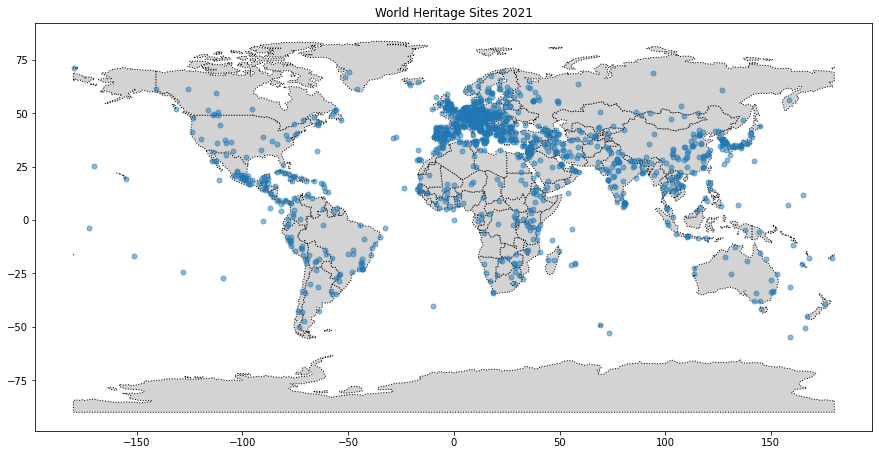

In [16]:
#using geopandas i was able to get a world map showing all the sites in the world (non-interactive)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15,10), linestyle=':', edgecolor='black', color='lightgray')
df.plot(ax=ax, markersize=25, alpha=0.5)
plt.title("World Heritage Sites 2021", fontsize=12)
plt.show()

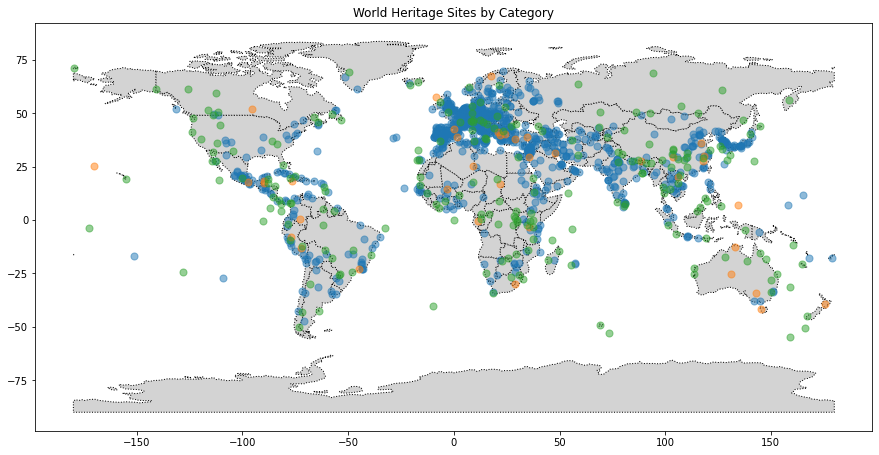

In [22]:
#this graph will show all the categories of WHS across the world: cultural(blue), natural(green), or mixed(orange)
ax=world.plot(figsize=(15,10),linestyle=":",edgecolor='black',color='lightgray')
df.groupby("category_long")['geometry'].plot(ax=ax,marker='o', markersize=50, alpha=0.5)
plt.title("World Heritage Sites by Category", fontsize=12)
plt.show()

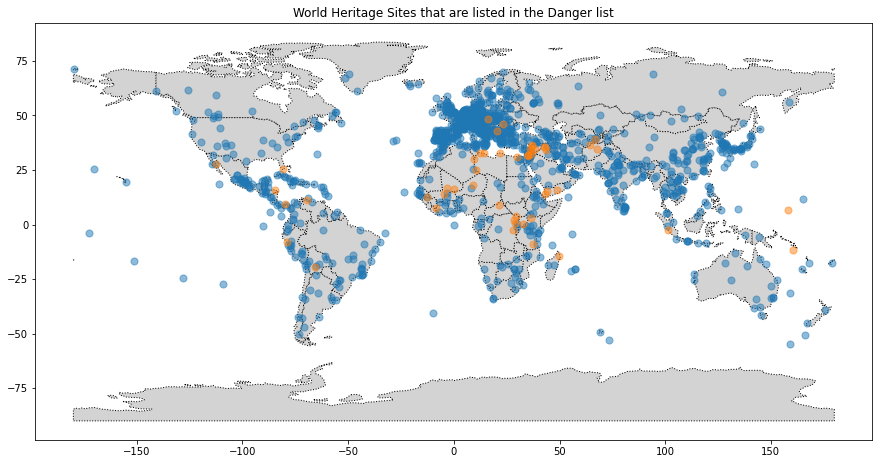

In [23]:
#Now, we show a world map view of the sites that are in danger (shown in orange)
ax=world.plot(figsize=(15,10),linestyle=":",edgecolor='black',color='lightgray')
df.groupby("danger")['geometry'].plot(ax=ax,marker='o', markersize=50, alpha=0.5)
plt.title("World Heritage Sites that are listed in the Danger list", fontsize=12)
plt.show()

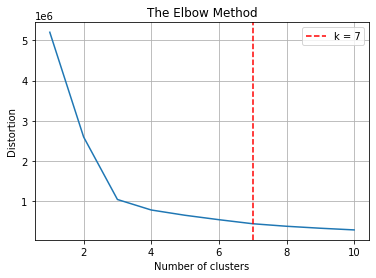

In [24]:
#K-means clustering (using the elbow method) to show the different clusters of sites around the world
X = df[["latitude","longitude"]]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()


In [25]:
#trying k = 7 to get 7 centroids
k = 7
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = df[["latitude","longitude"]]
## clustering
df_X = X.copy()
df_X["cluster"] = model.fit_predict(X)
## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     df_X.drop("cluster", axis=1).values)
df_X["centroids"] = 0
for i in closest:
    df_X["centroids"].iloc[i] = 1

    ## add clustering info to the original dataset
df[["cluster","centroids"]] = df_X[["cluster","centroids"]]
df.sample(5)

/Users/ramandeeprai/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Name  \
580                   Cueva de las Manos, Río Pinturas   
467                 Monasteries of Haghpat and Sanahin   
41                                   Kathmandu Valley    
506  Hallstatt-Dachstein / Salzkammergut Cultural L...   
252                                        Mogao Caves   

                                     short_description  date_inscribed  \
580  <p>The Cueva de las Manos, R&iacute;o Pinturas...            1999   
467  <p>These two Byzantine monasteries in the Tuma...            1996   
41   <p>The cultural heritage of the Kathmandu Vall...            1979   
506  <p>Human activity in the magnificent natural l...            1997   
252  <p>Situated at a strategic point along the Sil...            1987   

     danger  date_end  longitude   latitude  area_hectares category_long  \
580       0       NaN -70.666667 -47.150000         600.00      Cultural   
467       0       NaN  44.710280  41.095000           2.65      Cultural   
41        0    2007.0  85.308580  27.703950         167.37      Cultural   
506       0       NaN  13.646389  47.559444       28446.20      Cultural   
252       0       NaN  94.816670  40.133330       23392.00      Cultural   

    category_short Country name                           Region iso_code  \
580              C    Argentina  Latin America and the Caribbean       ar   
467              C      Armenia         Europe and North America       am   
41               C        Nepal             Asia and the Pacific       np   
506              C      Austria         Europe and North America       at   
252              C        China             Asia and the Pacific       cn   

     transboundary rev_bis                     geometry  cluster  centroids  
580              0     NaN  POINT (-70.66667 -47.15000)        3          0  
467              0     Bis    POINT (44.71028 41.09500)        6          0  
41               0     bis    POINT (85.30858 27.70395)        1          0  
506              0     NaN    POINT (13.64639 47.55944)        0          0  
252              0     NaN    POINT (94.81667 40.13333)        1          0

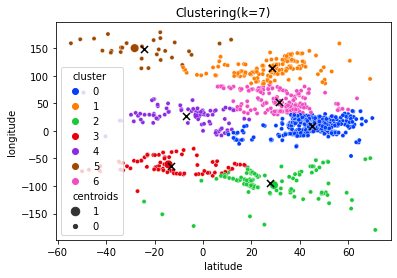

In [27]:
## plot
fig, ax = plt.subplots()
sns.scatterplot(x="latitude", y="longitude", data=df, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering(k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', 
           marker="x")

In [40]:
#plotting the clusters on an interactive map, large circles show the areas currently in danger
x, y = "latitude", "longitude"
color = "cluster"
size = "danger"
popup = "Name"
marker = "centroids"
data = df.copy()
## create color column
lst_elements = sorted(list(df[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location= [20,0], tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
lst_elements = sorted(list(df[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           popup=row[marker], draggable=False,          
           icon=folium.Icon(color="black")).add_to(map_), axis=1)
## plot the map
map_
